# Sprint 9 Project: OilyGiant well recommendation

## Project description:

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

Collect the oil well parameters in the selected region: oil quality and volume of reserves;
Build a model for predicting the volume of reserves in the new wells;
Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Introduction

This project will involve three datasets: geo_data_0, geo_data_1, and geo_data_2. Each dataset refers to a specific region that is being considered for the construction of new oil wells, and each of the 3 datasets contain the same features including: 

id — unique oil well identifier

f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)

product — volume of reserves in the oil well (thousand barrels).

### Other parameters for selecting the region with the highest total profit for selected wells include:

When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

The budget for development of 200 oil wells is 100 USD million.

One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

### Approach:

I will start by examining and cleaning each dataset. Next, I will train Linear Regression models for each region, along with calculating the average volume of predicted reserves and model RMSE.

Before calculating the risk and profit of each individual region, I will calculate the amount of reserves needed to break even.

Finally, I will use bootstrapping to find the distribution of profit, calculate the risks, and assess the outcomes.

## Uploading and preparing data

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

importing necessary libraries

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

uploading datasets

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


After taking a general look at each dataset and calling info(), it appears there are no missing values and that data types are appropriate. However, I will remove irrelevant columns to ensure the model can run smoother and pick up on patterns.

### Removing Irrelevant Data

In [9]:
geo_data_0 = geo_data_0.drop(columns='id')

In [10]:
geo_data_1 = geo_data_1.drop(columns='id')

In [11]:
geo_data_2 = geo_data_2.drop(columns='id')

In [12]:
geo_data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [13]:
geo_data_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [14]:
geo_data_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


ensured irrelevant column was deleted

In [15]:
geo_data_0.duplicated().sum()

0

In [16]:
geo_data_1.duplicated().sum()

0

In [17]:
geo_data_2.duplicated().sum()

0

ensured there were no exact duplicates that could possibly skew data

## EDA

<AxesSubplot:title={'center':'Region 0 product distribution'}, ylabel='Frequency'>

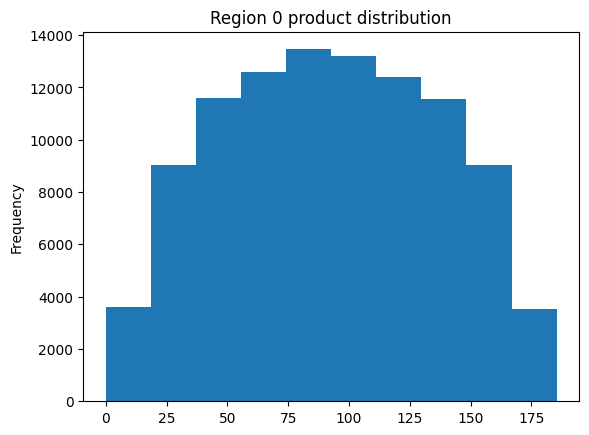

In [33]:
geo_data_0['product'].plot(kind='hist', title='Region 0 product distribution', xlabel='product')

<AxesSubplot:title={'center':'Region 1 product distribution'}, ylabel='Frequency'>

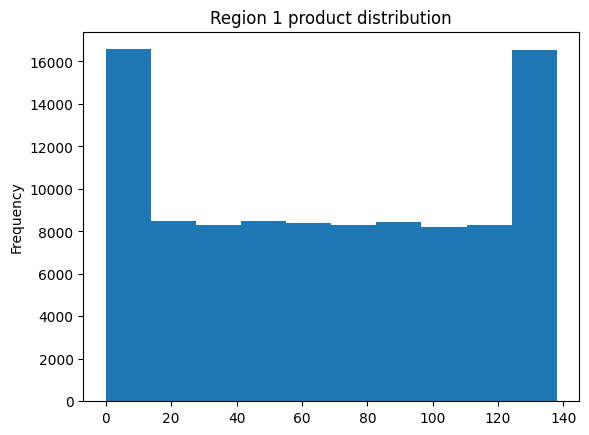

In [34]:
geo_data_1['product'].plot(kind='hist', title='Region 1 product distribution', xlabel='product')

<AxesSubplot:title={'center':'Region 2 product distribution'}, ylabel='Frequency'>

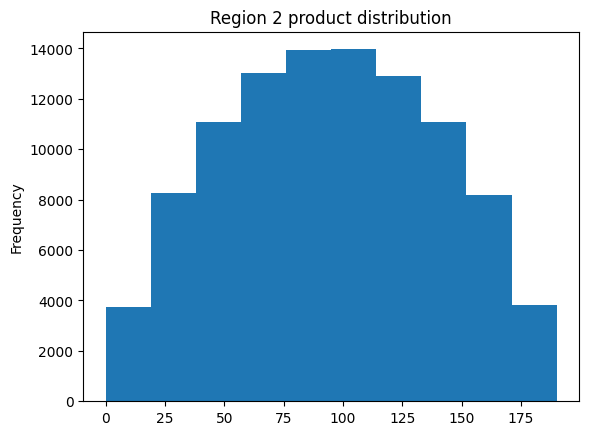

In [35]:
geo_data_2['product'].plot(kind='hist', title='Region 2 product distribution', xlabel='product')

looking at data distribution by region

## Training and testing models

In [36]:
data = [geo_data_0, geo_data_1, geo_data_2]

combined datasets to make the model training process easier

In [20]:
samples_target = []
samples_predictions = []
for region in range(3):
    region_data = data[region]
    features = region_data.drop('product', axis=1)
    target = region_data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    samples_target.append(target_valid.reset_index(drop=True))
    samples_predictions.append(pd.Series(predictions))

    mean_product = target.mean()
    model_rmse = mean_squared_error(target_valid, predictions)**.5

    print('Region', region)
    print('mean product amount =', mean_product)
    print('model RMSE:', model_rmse)

Region 0
mean product amount = 92.50000000000001
model RMSE: 37.5794217150813
Region 1
mean product amount = 68.82500000000002
model RMSE: 0.893099286775617
Region 2
mean product amount = 95.00000000000004
model RMSE: 40.02970873393434


### Conclusion of models


After training models for each region, Region 2 is predicted to have the highest average volume of predicted reserves with Region 0 not far behind. However, the RMSE is fairly high, indicating more error and less precise predictions. Though Region 1 shows significantly less predicted reserves, the RMSE score suggests that this prediction is more accurate than the others.

Training models and examining average volume of reserves/RMSE of models is not enough information to suggest the location of new wells, therefore further calculations are necessary.

## Preparing for profit calculation

In [21]:
#dividing by 100 to make calculations easier
total_budget_USD = 1000000 
cost_per_point = 5000
points_per_budget = total_budget_USD // cost_per_point
product_price = 45

def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:points_per_budget]
    product = selected_points.sum()
    revenue = product * product_price
    cost = total_budget_USD
    return revenue - cost

divided all numbers by 100, created function for calculating product to be used later.

In [22]:
cost_per_point = total_budget_USD / points_per_budget
zero_profit_product = cost_per_point / product_price
print('amount of product for 0 profit:', zero_profit_product)

amount of product for 0 profit: 111.11111111111111


in order for 0% loss/profit to occur (break even), there must be 11,111.1 product.

## Calculating profit and risk

In [24]:
sample_size = 500
bootstrap_size = 1000

state = np.random.RandomState(12345)

for region in range(3):
    target = samples_target[region]
    predictions = samples_predictions[region]
    
    profit_values = []
    for i in range(bootstrap_size):
        target_sample = target.sample(sample_size, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        profit_values.append(profit(target_sample, predictions_sample))
    profit_values = pd.Series(profit_values)
    
    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025), profit_values.quantile(0.975))
    negative_profit_chance = (profit_values < 0).mean()
    
    print('Region', region)
    print('Mean profit:', mean_profit)
    print('95% confidence interval:', confidence_interval)
    print('Risk of losses:', negative_profit_chance * 100, '%')


Region 0
Mean profit: 42593.85269105924
95% confidence interval: (-10209.009483793723, 94797.63533583676)
Risk of losses: 6.0 %
Region 1
Mean profit: 51825.9493697325
95% confidence interval: (12812.323143308511, 95361.29820669086)
Risk of losses: 0.3 %
Region 2
Mean profit: 42019.40053440501
95% confidence interval: (-11585.26091600114, 98962.99398445745)
Risk of losses: 6.2 %


### Conclusion:

After calculating risk of losses and avg profit, I suggest Region 1 for construction of the new wells. Not only is this the only region where risk of losses are under 2.5%, but it also has the highest mean profit and it is the only region where 95% confidence interval does not include negative values.